# Lab 2.07 - Univariate Analysis

## Exercise 7 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [ ]:
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns

Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

In [ ]:
ais = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/ais.csv')
ais.head()



,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [ ]:
ais.set_index(['id'])

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis


In [ ]:
ais.sex=ais.sex.astype('category')

In [ ]:
ais.sport=ais.sport.astype('category')

In [ ]:
ais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      202 non-null    int64   
 1   rcc     202 non-null    float64 
 2   wcc     202 non-null    float64 
 3   hc      202 non-null    float64 
 4   hg      202 non-null    float64 
 5   ferr    202 non-null    int64   
 6   bmi     202 non-null    float64 
 7   ssf     202 non-null    float64 
 8   pcBfat  202 non-null    float64 
 9   lbm     202 non-null    float64 
 10  ht      202 non-null    float64 
 11  wt      202 non-null    float64 
 12  sex     202 non-null    category
 13  sport   202 non-null    category
dtypes: category(2), float64(10), int64(2)
memory usage: 19.9 KB


In [ ]:
ais.dtypes

id           int64
rcc        float64
wcc        float64
hc         float64
hg         float64
ferr         int64
bmi        float64
ssf        float64
pcBfat     float64
lbm        float64
ht         float64
wt         float64
sex       category
sport     category
dtype: object

<Axes: xlabel='count', ylabel='sport'>

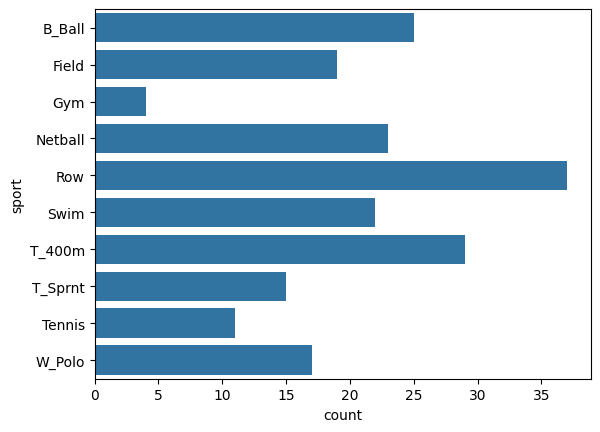

In [ ]:
# plot for sports
sns.countplot(data=ais,y='sport')

<Axes: xlabel='count', ylabel='sport'>

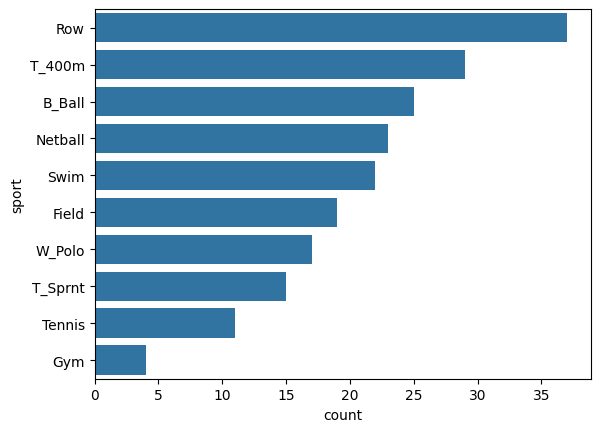

In [ ]:
# plot for sport , ordered  by number of occurence
sns.countplot(data=ais,y='sport',order=ais.sport.value_counts().index)

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [ ]:
row = ais[ais.sport=='Row']
row.head()

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
13,14,4.26,6.2,41.0,13.9,48,25.44,90.2,17.71,66.24,177.9,80.5,f,Row
14,15,4.63,6.0,43.7,14.7,30,22.63,97.2,18.77,57.92,177.5,71.3,f,Row
15,16,4.36,5.8,40.3,13.3,29,21.86,99.9,19.83,56.52,179.6,70.5,f,Row
16,17,3.91,7.3,37.6,12.9,43,22.27,125.9,25.16,54.78,181.3,73.2,f,Row
17,18,4.51,8.3,43.7,14.7,34,21.27,69.9,18.04,56.31,179.7,68.7,f,Row


In [ ]:
row_net_tennis = ais[(ais.sport=='Row') | (ais.sport=='Tennis') | (ais.sport=='Tennis') ]
row_net_tennis .head()


,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
13,14,4.26,6.2,41.0,13.9,48,25.44,90.2,17.71,66.24,177.9,80.5,f,Row
14,15,4.63,6.0,43.7,14.7,30,22.63,97.2,18.77,57.92,177.5,71.3,f,Row
15,16,4.36,5.8,40.3,13.3,29,21.86,99.9,19.83,56.52,179.6,70.5,f,Row
16,17,3.91,7.3,37.6,12.9,43,22.27,125.9,25.16,54.78,181.3,73.2,f,Row
17,18,4.51,8.3,43.7,14.7,34,21.27,69.9,18.04,56.31,179.7,68.7,f,Row


In [ ]:
fem_bask_row = ais[(ais.sex=="f") & (ais.sport=="Row") | (ais.sport=="B_Ball")]

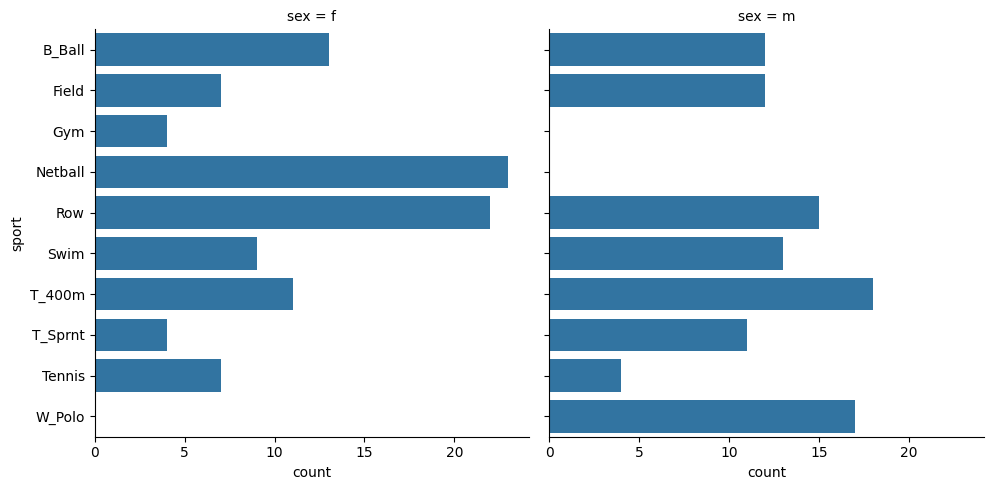

In [ ]:
sns.catplot(data=ais,kind='count',col="sex",y="sport")

<Axes: xlabel='ht', ylabel='Density'>

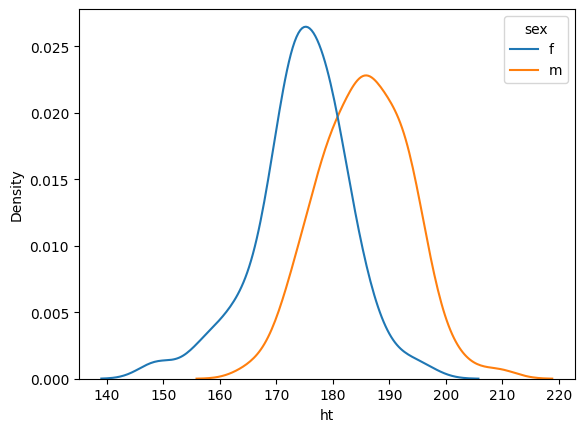

In [ ]:
sns.kdeplot(data=ais,x="ht", hue ='sex')

<Axes: xlabel='ht', ylabel='sex'>

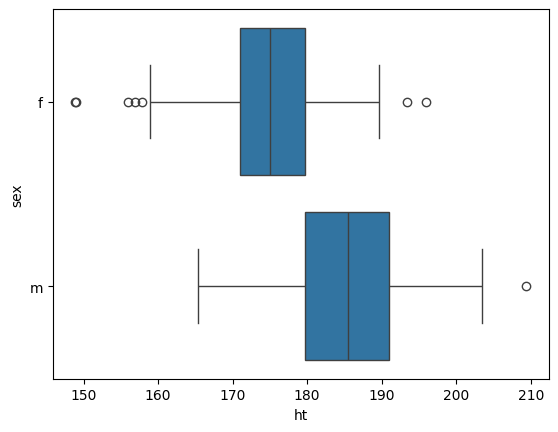

In [ ]:
sns.boxplot(data=ais,x="ht", y ='sex')

<Axes: xlabel='ht', ylabel='sport'>

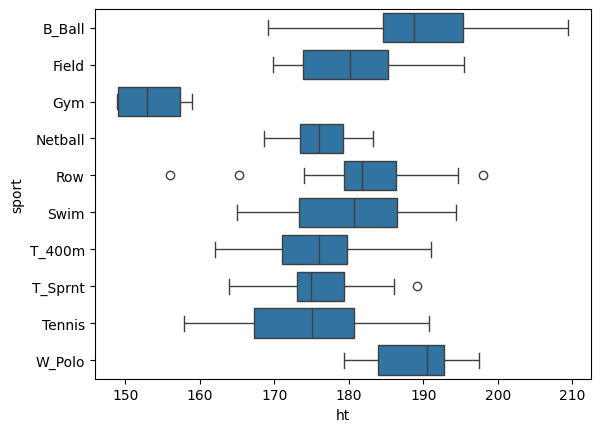

In [ ]:
sns.boxplot(data=ais,x="ht", y ='sport')

<Axes: xlabel='ht', ylabel='Density'>

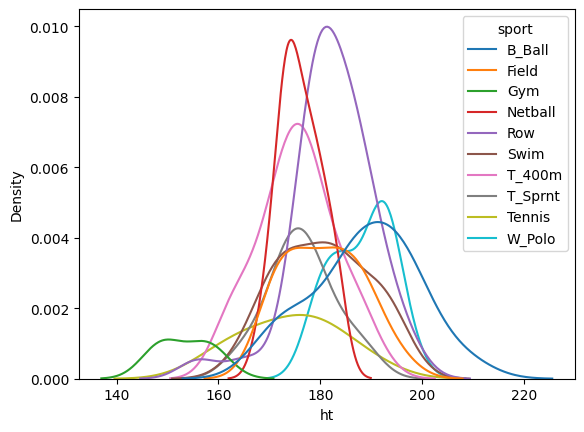

In [ ]:
sns.kdeplot(data=ais,x="ht", hue ='sport')

In [ ]:
print(f"frequencies of row.sex \n {row.sex.value_counts()}" )
print(f"frequencies of row_net_tennis.sex \n {row_net_tennis.sex.value_counts()}" )
print(f"frequencies of fem_bask_row.sex \n {fem_bask_row.sex.value_counts()}" )

frequencies of row.sex 
 sex
f    22
m    15
Name: count, dtype: int64
frequencies of row_net_tennis.sex 
 sex
f    29
m    19
Name: count, dtype: int64
frequencies of fem_bask_row.sex 
 sex
f    35
m    12
Name: count, dtype: int64


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |

In [ ]:
#measures for central despersion for 'ht'
print(f"Rowers \n {row['ht'].describe()}")

Rowers 
 count     37.000000
mean     182.375676
std        7.798376
min      156.000000
25%      179.300000
50%      181.800000
75%      186.300000
max      198.000000
Name: ht, dtype: float64
